# Estadística y regresión polinomial
---

In [1]:
# Intervalos de confianza para los coeficientes

!pip install statsmodels

In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

In [3]:
n = 50
x1 = np.random.rand(n) * 20
x2 = np.random.rand(n) * 10
datos = pd.DataFrame({'x1': x1, 'x2': x2,
                      'y': 2*x1 + 4*x2 - 3 + np.random.rand(n) * 0.1})
lr = smf.ols('y ~ x1 + x2', data = datos) # OLS -> Ordinary Least Squares
res = lr.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.634e+06
Date:                Fri, 24 Oct 2025   Prob (F-statistic):          8.10e-129
Time:                        15:20:09   Log-Likelihood:                 108.98
No. Observations:                  50   AIC:                            -212.0
Df Residuals:                      47   BIC:                            -206.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9517      0.012   -255.077      0.0

In [4]:
conf_int = res.conf_int(alpha = 0.05) # 95% de confianza
print(conf_int)

                  0         1
Intercept -2.974962 -2.928403
x1         1.998470  2.001438
x2         3.997064  4.002693


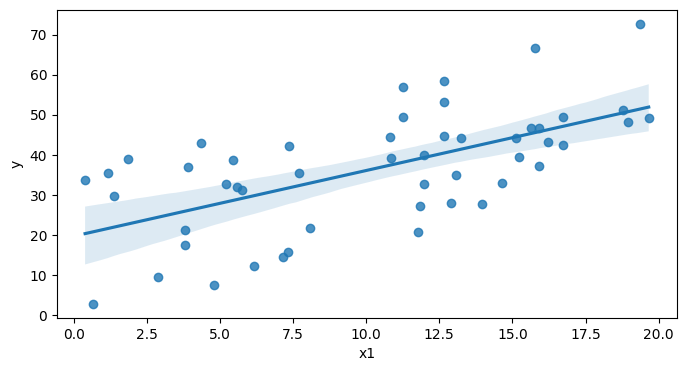

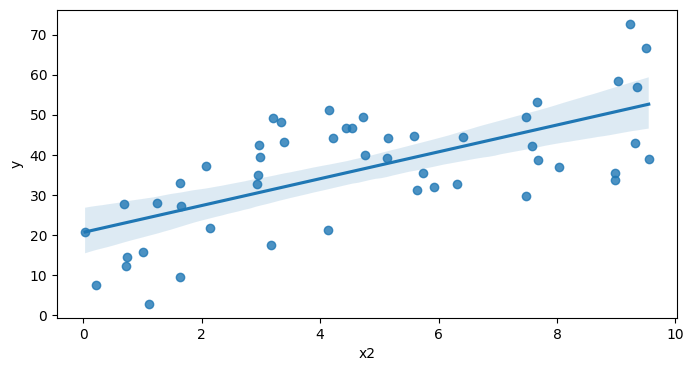

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,4))
sns.regplot(x = 'x1', y = 'y', data = datos, ci = 95) 
plt.show() # Resuelve nuevamente de forma interna, pero solo para una variable.0
plt.figure(figsize = (8,4))
sns.regplot(x = 'x2', y = 'y', data = datos, ci = 95)
plt.show() # Resuelve nuevamente de forma interna, pero solo para una variable.

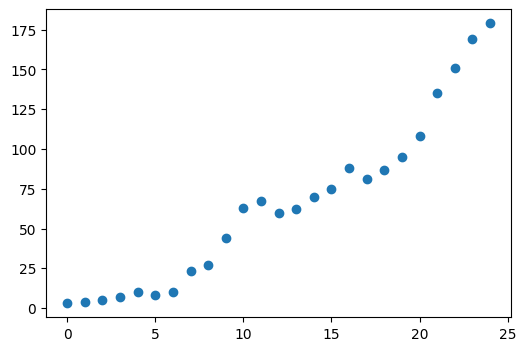

In [6]:
# Regresión polinomial 
y = [3, 4, 5, 7, 10, 8, 10, 23, 27, 44, 63, 67, 60, 62, 70, 75, 88, 81,
     87, 95, 108, 135, 151, 169, 179]
x = np.arange(len(y))
plt.figure(figsize = (6, 4))
plt.scatter(x, y)
plt.show()

In [7]:
# Características polinomiales
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, include_bias = False)
poly_feat = poly.fit_transform(x.reshape(-1, 1))
poly_feat[:-5]

array([[  0.,   0.],
       [  1.,   1.],
       [  2.,   4.],
       [  3.,   9.],
       [  4.,  16.],
       [  5.,  25.],
       [  6.,  36.],
       [  7.,  49.],
       [  8.,  64.],
       [  9.,  81.],
       [ 10., 100.],
       [ 11., 121.],
       [ 12., 144.],
       [ 13., 169.],
       [ 14., 196.],
       [ 15., 225.],
       [ 16., 256.],
       [ 17., 289.],
       [ 18., 324.],
       [ 19., 361.]])

In [8]:
# Modelo lineal para el polinomio
from sklearn.linear_model import LinearRegression
lr_poly = LinearRegression()
lr_poly.fit(poly_feat, y)
y_pred = lr_poly.predict(poly_feat)
lr_poly.coef_, lr_poly.intercept_

(array([1.73143813, 0.21727982]), np.float64(1.875897435897457))

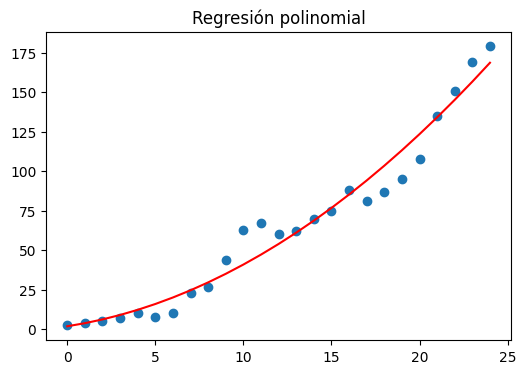

In [9]:
plt.figure(figsize = (6,4))
plt.scatter(x, y)
plt.plot(x, y_pred, 'r')
plt.title('Regresión polinomial')
plt.show()

#### **Tarea**: Intenta ajustarlo únicamente de forma lineal y posteriormente compara el error cuadrático medio de ambos ajustes. ¿Cuál es mejor?

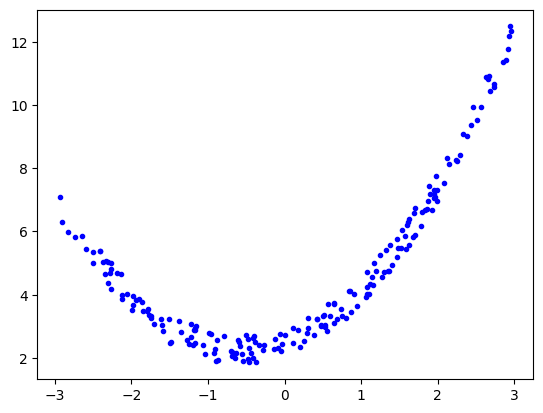

In [10]:
# Determinar grado del polinomio
x = 6 * np.random.rand(200, 1) - 3 
y = 0.8 * x**2 + 0.9 * x + 2 + np.random.rand(200, 1)
# Ecuación buscada: y = 0.8x^2 + 0.9x +2
plt.plot(x, y, 'b.')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Entrenamiento / Pruebas
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Modelo lineal 'puro'
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('  R2 = ', r2_score(y_test, y_pred))

RMSE =  1.7532544817086466
  R2 =  0.26721372955673095


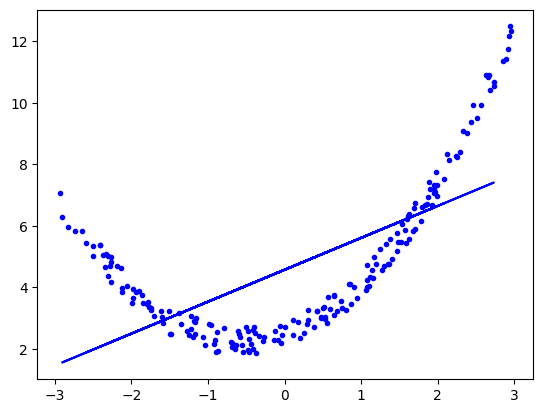

In [13]:
plt.plot(x_test, y_pred, 'b')
plt.plot(x, y, 'b.')
plt.show()

# Es intuitivo que se trata de un mal ajuste.

In [14]:
# Polinomio grado 2
poly = PolynomialFeatures(degree = 2, include_bias = False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
# Modelo lineal 'muggle'
lr_poly = LinearRegression()
lr_poly.fit(x_train_poly, y_train)
y_pred_poly = lr_poly.predict(x_test_poly)
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred_poly)))
print('  R2 = ', r2_score(y_test, y_pred_poly))

RMSE =  0.29665402195824314
  R2 =  0.9790208499191764


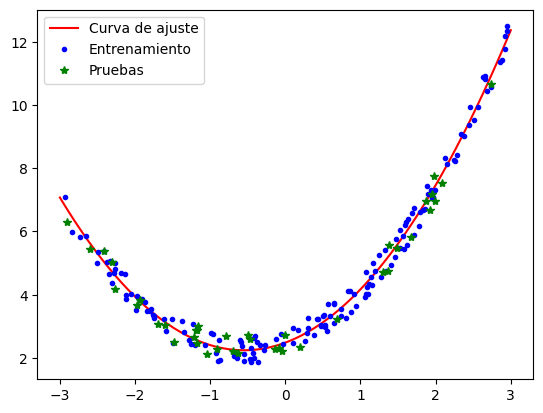

In [15]:
x_new = np.linspace(-3, 3, 100).reshape(100, 1)
x_new_poly = poly.transform(x_new)
y_new_pred = lr_poly.predict(x_new_poly)
plt.plot(x_new, y_new_pred, 'r', label = 'Curva de ajuste')
plt.plot(x_train, y_train, 'b.', label = 'Entrenamiento')
plt.plot(x_test, y_test, 'g*', label = 'Pruebas')
plt.legend()
plt.show()

In [16]:
# Polinomio grado ¿?
poly = PolynomialFeatures(degree = 3, include_bias = False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
# Modelo lineal 'muggle'
lr_poly = LinearRegression()
lr_poly.fit(x_train_poly, y_train)
y_pred_poly = lr_poly.predict(x_test_poly)
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred_poly)))
print('  R2 = ', r2_score(y_test, y_pred_poly))

RMSE =  0.2913260176650316
  R2 =  0.9797676675420636


In [17]:
poly = PolynomialFeatures(degree = 4, include_bias = False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
# Modelo lineal 'muggle'
lr_poly = LinearRegression()
lr_poly.fit(x_train_poly, y_train)
y_pred_poly = lr_poly.predict(x_test_poly)
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred_poly)))
print('  R2 = ', r2_score(y_test, y_pred_poly))

RMSE =  0.2912519652283734
  R2 =  0.9797779519863337


In [18]:
poly = PolynomialFeatures(degree = 10, include_bias = False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
# Modelo lineal 'muggle'
lr_poly = LinearRegression()
lr_poly.fit(x_train_poly, y_train)
y_pred_poly = lr_poly.predict(x_test_poly)
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred_poly)))
print('  R2 = ', r2_score(y_test, y_pred_poly))

RMSE =  0.29453963289905954
  R2 =  0.9793188401835017


In [19]:
# Múltiples características
np.random.seed(42)
n = 100
x1 = np.absolute(np.random.randn(n, 1) * 10)
x2 = np.absolute(np.random.randn(n, 1) * 30)
X = np.concatenate((x1, x2), axis = 1)
y = 2*x1**2 + 3*x2 + 2 + np.random.randn(n, 1) * 20

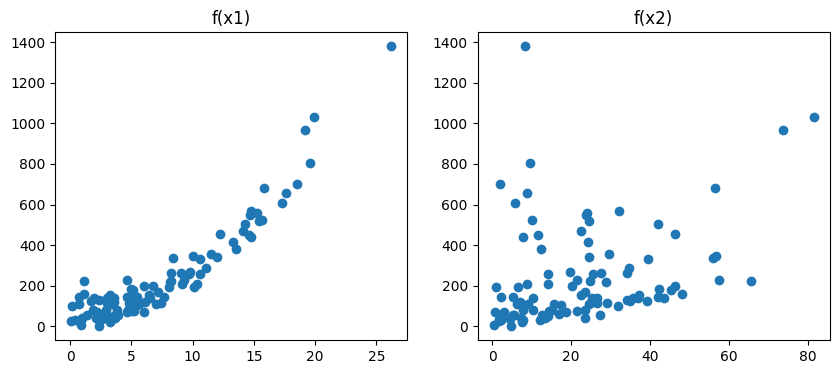

In [20]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
axes[0].scatter(x1, y)
axes[1].scatter(x2, y)
axes[0].set_title('f(x1)')
axes[1].set_title('f(x2)')
plt.show()

In [21]:
# Modelo lineal puro
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr  = lr.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)
lr_rmse, lr_r2

(np.float64(66.64691598731712), 0.8030013578897038)

In [22]:
# Modelo lineal muggle
poly = PolynomialFeatures(degree = 2, include_bias = False)
X_poly_feat = poly.fit_transform(X)
X.shape, X_poly_feat.shape # Nótese la diferencia en dimensiones: Son en total x1, x1^2, x2, x2^2, x1x2

((100, 2), (100, 5))

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_poly_feat, y, test_size = 0.3, random_state = 42)
# Modelo "lineal"
lr_poly = LinearRegression()
lr_poly.fit(X_train, y_train)
y_pred_poly = lr_poly.predict(X_test)
poly_rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)
poly_rmse, r2_poly

(np.float64(19.421014082940324), 0.9832718881542013)

In [24]:
# KNN
data = pd.read_csv('tallas.csv')
data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
altura,170,168,163,168,158,160,168,165,160,158,169,158,170,165,161,170,163,160,165,163
peso,64,62,60,63,63,60,66,61,59,59,67,58,63,65,60,68,61,64,62,64
talla,L,L,M,L,M,M,L,L,M,M,L,M,L,L,M,L,M,L,L,L


In [25]:
talla_map = {'L': 1, 'M': 0}
data['et'] = data.talla.map(talla_map)
data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
altura,170,168,163,168,158,160,168,165,160,158,169,158,170,165,161,170,163,160,165,163
peso,64,62,60,63,63,60,66,61,59,59,67,58,63,65,60,68,61,64,62,64
talla,L,L,M,L,M,M,L,L,M,M,L,M,L,L,M,L,M,L,L,L
et,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,1,1


In [26]:
X, y = np.array(data[['altura', 'peso']].values), data.et.values
new1 = np.array([160, 63])
new2 = np.array([164, 62])

In [27]:
def euclides(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

def knn(X, y, p_, k = 5):
    dists = [euclides(p_, train) for train in X]
    kn_ind = np.argsort(dists)[:k]
    return kn_ind

def show_knn(X, y, p_, knn_, color = 'k'):
    plt.scatter(X[:, 0], X[:, 1], c = y)
    plt.scatter(p_[0], p_[1], color = color)
    for c in knn_.astype(int):
        p = X[c]
        plt.plot([p_[0], p[0]], [p_[1], p[1]])
    plt.show()

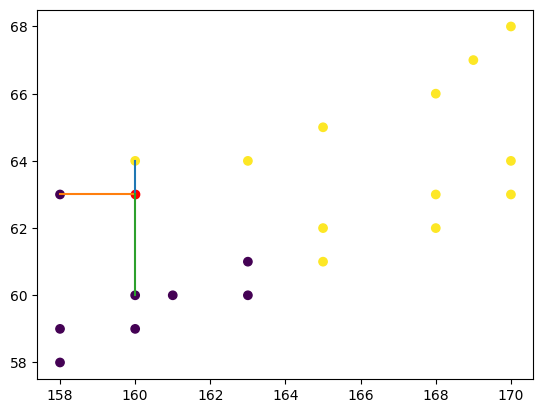

In [28]:
c = knn(X, y, new1, 3)
show_knn(X, y, new1, c, 'r')

In [29]:
df = pd.read_csv("diabetes.csv")

# df.tail(2)

In [30]:
# Separar 'X' e 'y' de entrenamiento/prueba
X, y = df.iloc[:,:-1].values, df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X.shape, X_train.shape, X_test.shape

((768, 8), (614, 8), (154, 8))

In [31]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Exactitud: ', acc)

Exactitud:  0.6623376623376623


### **Sugerencia:** Revisa el sistema de recomendación de anime disponible en GitHub, el enlace está en las notas para este tema.

In [33]:
# KNN clasificador modo BootCamp
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
abulon = pd.read_csv(url, header=None)
abulon.columns = ["Sex", "Length", "Diameter", "Height", "Whole weight",
                  "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
abulon.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


<Axes: >

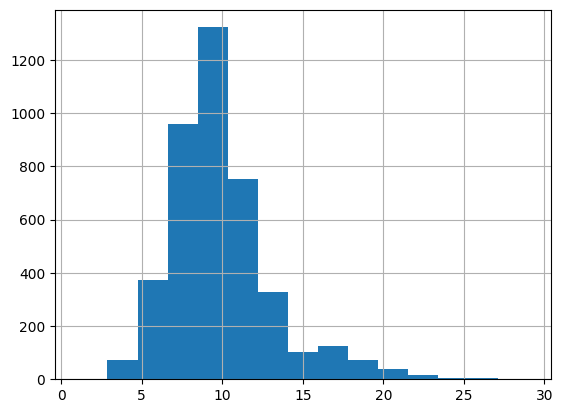

In [34]:
# Predicción de la edad con el número de anillos.

abulon = abulon.drop('Sex', axis = 1) # El género no influye en el número de anillos
abulon.Rings.hist(bins = 15)

### **Tarea:** Realiza regresión lineal sobre `abulon`. Compáralo con `KNeighborsClassifier`, que se realizará a continuación.

In [35]:
# Correlación de anillos con las demás variables
corr = abulon.corr()
corr.Rings

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

<Axes: >

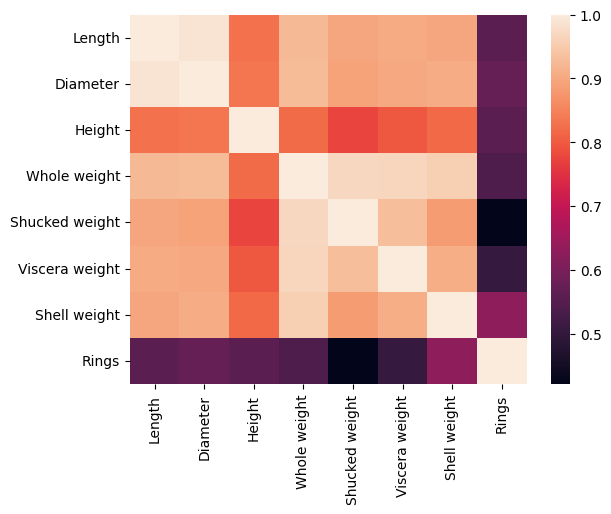

In [36]:
import seaborn as sns
sns.heatmap(corr)

In [37]:
X, y = abulon.drop('Rings', axis = 1).values, abulon.Rings.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X.shape, X_train.shape

((4177, 7), (3132, 7))

In [38]:
knn = KNN(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
yt_pred = knn.predict(X_train)
print('RMSE: ', np.sqrt(mean_squared_error(y_train, yt_pred)))

RMSE:  2.5135647321752526


In [40]:
y_pred = knn.predict(X_test)
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  2.7190626023331457


### **Tarea:** Busca un modo de visualizar el ajuste anterior.